In [278]:
import numpy as np
import sys
import pandas as pd
from queue import Queue
#sys.argv=["test.py",'sz2',"CESM"]
#argv = sys.argv[:]
# type=sys.argv[1]
# file_name=sys.argv[2]
type_com = 'sz2'
file_name = 'Hurricane'
thread = [128]#[i for i in range(1,25)] + [32,64,128,256,512,1024]
odata=[]


for nums in thread:
    out_name = './omp_outcome/'+type_com+'/%d/'%(nums)+file_name
    with open(out_name, 'r') as file:
        data = file.read()

    key = [file_name,'threads','1E-1','1E-2','1E-3','1E-4','1E-5','1E-6','1E-7','1E-8']
    #data_tmp = []
    if type_com == 'sz2':
        data=np.array(data.split())
        num=len(data)
        count, flag = 0, 0
        temp = []
        for i in range(num):
            if data[i].find('compressionRatio')!=-1:
                temp.append(data[i][data[i].find('=')+1:])
                count += 1
            elif count / 8 == flag and data[i].find(file_name) !=-1 :
                field = data[i][data[i].find(file_name)+len(file_name)+1 : ].replace('.f32','').replace('.d64','')\
                    .replace('.sz','').replace('.out','')
                if len(odata) > 0 and odata[-1][0] == field:
                    continue
                flag += 1
                temp.append(field)
                temp.append(nums)
            if(len(temp) == 10) :
                odata.append(temp)
                temp = []
    elif type_com == 'sz3':
        data=np.array(data.split('\n'))
        num=len(data)
        count, flag, valid = 0, 0, 0
        temp = []
        for i in range(num):
            if(len(temp) == 10) :
                odata.append(temp)
                temp = []
            if data[i].find(file_name) !=-1:
                print(i,count / 8, flag)
            if data[i].find('compression ratio = ')!=-1:
                if valid == 1:
                    temp.append(data[i][data[i].find('= ')+1:])
                    count += 1
                    valid = 0
                else:
                    valid = 1
            elif count / 8 == flag and data[i].find(file_name) !=-1:
                field = data[i][data[i].find(file_name)+len(file_name)+1 : ].replace('.f32','').replace('.d64','')\
                    .replace('.sz','').replace('.out','')
                # field = field[:field.find('.')]
                if len(odata) > 0 and odata[-1][0] == field:
                    continue
                flag += 1
                temp.append(field)
                temp.append(nums)

    else :
        data=np.array(data.split())
        num=len(data)
        count, flag = 0, 0
        for i in range(num):
            if data[i].find('ratio')!=-1:
                odata.append(data[i][data[i].find('=')+1:])
                count += 1
            elif count / 8 == flag and data[i].find(file_name) !=-1 :
                field = data[i][data[i].find(file_name)+len(file_name)+1:]
                if len(odata) > 0 and odata[-1][0] == field:
                    continue
                else:
                    flag += 1
                    odata.append(field)
                    odata.append(nums)
        #print(data)
odata=np.array(odata).reshape(-1,10).T
odata
odata = dict(zip(key,odata))

ratio_pd = pd.DataFrame(odata)
# ratio_pd
ratio_pd.iloc[:, 1] = ratio_pd.iloc[:, 1].astype(int)
ratio_pd.iloc[:, 2:] = ratio_pd.iloc[:, 2:].astype(float)
ratio_pd = ratio_pd.groupby([file_name,'threads']).mean().reset_index()

# data_csv = dict(zip(key,odata))
ratio_pd.to_csv('./ratio/omp/'+type_com+'/'+file_name+'_'+type_com+'.csv',index=False)

In [ ]:
import numpy as np
import sys
import pandas as pd
from queue import Queue

# type_com=sys.argv[1]
# file_name=sys.argv[2]
type_com='sz2'
file_name='Miranda'
thread = [i for i in range(1,25)] + [32,64, 128,256,512,1024]
com_time = []
decom_time = []
for nums in thread:
    out_name = './omp_outcome/'+type_com+'/%d/'%(nums)+file_name
    with open(out_name, 'r') as file:
        data = file.read()
    temp_com, temp_decom = [], []
    key = [file_name,'threads','1E-1','1E-2','1E-3','1E-4','1E-5','1E-6','1E-7','1E-8']

    if type_com == 'sz3' or  type_com == 'sz2':
        data = np.array(data.split('\n'))
        num = len(data)
        count, flag = 0, 0
        for i in range(num):
            if 'compression time' in data[i] and 'decompression time' not in data[i]:
                temp_com.append(data[i][data[i].find('= ')+1:])
                count += 1
                if(len(temp_com) == 10) :
                    com_time.append(temp_com)
                    temp_com = []
            elif data[i].find('decompression time')!=-1:
                temp_decom.append(data[i][data[i].find('= ')+1:].split()[0])
                print(temp_decom)
                if(len(temp_decom) == 10) :
                    decom_time.append(temp_decom)
                    temp_decom = []
            elif count / 8 == flag and data[i].find(file_name) !=-1:
                field = data[i][data[i].find(file_name)+len(file_name)+1 : ].split()[0].replace('.f32','').replace('.d64','')\
                    .replace('.sz','').replace('.out','')
                if len(com_time) > 0 and com_time[-1][0] == field:
                    continue
                else: 
                    flag += 1
                    temp_com.append(field)
                    temp_com.append(nums)
                    temp_decom.append(field)
                    temp_decom.append(nums)
    else :
        data = np.array(data.split())
        num = len(data)
        count, flag = 0, 0
        for i in range(num):
            if data[i].find('Compression_time')!=-1:
                com_time.append(data[i][data[i].find('=')+1:])
                count += 1
            elif data[i].find('Decompression_time')!=-1:

                decom_time.append(data[i][data[i].find('=')+1:])
            elif count / 8 == flag and data[i].find(file_name) !=-1:
                flag += 1
                field = data[i][data[i].find(file_name)+len(file_name)+1:].replace('.f32','').replace('.d64','')
                com_time.append(field)
                com_time.append(nums)
                decom_time.append(field)
                decom_time.append(nums)

com_time=np.array(com_time).reshape(-1,10).T
decom_time=np.array(decom_time).reshape(-1,10).T

com_time = dict(zip(key,com_time))

com_time_pd = pd.DataFrame(com_time)
com_time_pd.iloc[:, 1] = com_time_pd.iloc[:, 1].astype(int)
com_time_pd.iloc[:, 2:] = com_time_pd.iloc[:, 2:].astype(float)
com_time_pd = com_time_pd.groupby([file_name,'threads']).mean().reset_index()

decom_time = dict(zip(key,decom_time))
decom_time_pd = pd.DataFrame(decom_time)
decom_time_pd.iloc[:, 2:] = decom_time_pd.iloc[:, 2:].astype(float)
decom_time_pd.iloc[:, 1] = decom_time_pd.iloc[:, 1].astype(int)
decom_time_pd = decom_time_pd.groupby([file_name,'threads']).mean().reset_index()

com_time_pd.to_csv('./time/omp/'+type_com+'/'+file_name+'_'+type_com+'_com'+'.csv',index=False)
decom_time_pd.to_csv('./time/omp/'+type_com+'/'+file_name+'_'+type_com+'_decom'+'.csv',index=False)

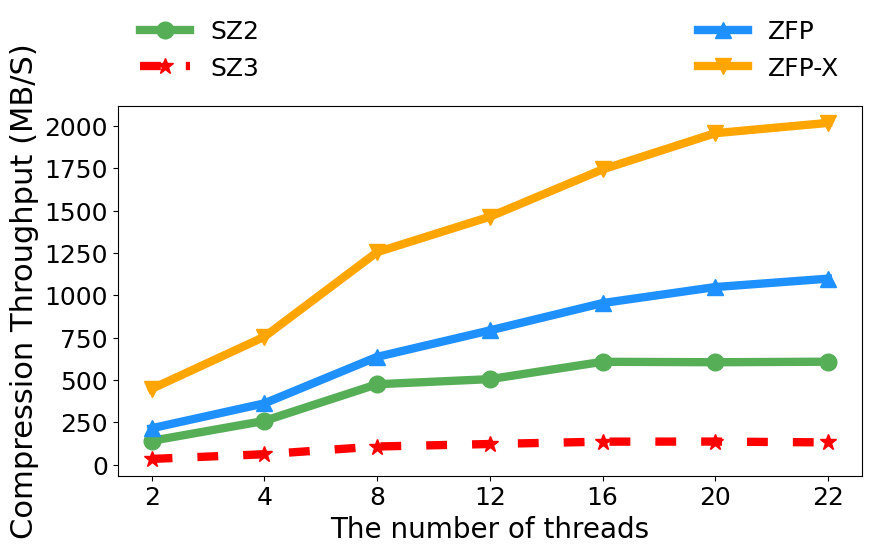

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from queue import Queue
from scipy.interpolate import  make_interp_spline

dataset = 'SCALE'
#size = 512 * 512 * 512 * 4 * 6 / 1024 /1024
size = 500 * 500 * 100 * 4 * 20 / 1024 /1024 
#size = 1200 * 1200 * 98 * 4 * 12 / 1024 / 1024
thread = [2,4,8,12,16,20,22]
x = np.arange(len(thread))
error = '1E-3'

path_zfp = './time/omp/zfp/'+dataset+'_zfp_com.csv'
path_zfpx = './time/omp/zfpx/'+dataset+'_zfpx_com.csv'
path_sz2 = './time/omp/sz2/'+dataset+'_sz2_com.csv'
path_sz3 = './time/omp/sz3/'+dataset+'_sz3_com.csv'


data_zfp = pd.read_csv(path_zfp)
data_zfpx = pd.read_csv(path_zfpx)
data_sz2 = pd.read_csv(path_sz2)
data_sz3 = pd.read_csv(path_sz3)

fdata_zfp = data_zfp.iloc[:, 1:]
fdata_zfpx = data_zfpx.iloc[:, 1:]
fdata_sz2 = data_sz2.iloc[:, 1:]
fdata_sz3 = data_sz3.iloc[:, 1:]

fdata_zfp = fdata_zfp.groupby('threads').sum().reset_index()
fdata_zfpx = fdata_zfpx.groupby('threads').sum().reset_index()
fdata_sz2 = fdata_sz2.groupby('threads').sum().reset_index()
fdata_sz3 = fdata_sz3.groupby('threads').sum().reset_index()

fdata_zfp.iloc[:,1:] = size / fdata_zfp.iloc[:,1:]
fdata_zfpx.iloc[:,1:] = size / fdata_zfpx.iloc[:,1:]
fdata_sz2.iloc[:,1:] = size / fdata_sz2.iloc[:,1:]
fdata_sz3.iloc[:,1:] = size / fdata_sz3.iloc[:,1:]
width = 0.17
interval = width * 0.25

zfp, zfpx, sz2, sz3 = [], [], [], []

for i in thread:
    zfp.extend(fdata_zfp[fdata_zfp['threads'] == i][error])
    zfpx.extend(fdata_zfpx[fdata_zfpx['threads'] == i][error])
    sz2.extend(fdata_sz2[fdata_sz2['threads'] == i][error])
    sz3.extend(fdata_sz3[fdata_sz3['threads'] == i][error])

p0 = plt.plot(x, sz2, linewidth=6, marker='o', markersize=12, color="#56ae57")
p1 = plt.plot(x, sz3, linewidth=6, marker='*', markersize=12, color="red", linestyle='--', dashes=(2.5, 3))
p2 = plt.plot(x, zfp, linewidth=6, marker='^', markersize=12, color="#1E90FF")
p3 = plt.plot(x, zfpx, linewidth=6, marker='v', markersize=12, color="#FFA500")

# plt.xticks(x + width * 1.5 + interval * 1.5, thread, fontsize=18)
plt.xticks(x, thread, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Serial and the number of threads', fontsize=20)
plt.ylabel('Compression Throughput (MB/S)', fontsize=22)
a=plt.legend([p0[0],p1[0]], ['SZ2','SZ3'],bbox_to_anchor=(0.00, 1.01), loc=3, frameon=False,fontsize=18)
plt.legend([p2[0],p3[0]], ['ZFP','ZFP-X'],bbox_to_anchor=(1.00,1.01), loc=4, frameon=False,fontsize=18)
plt.gca().add_artist(a)
plt.gcf().set_size_inches(9.6,4.8) 
# size = plt.gcf().get_size_inches()
plt.savefig("./draw/omp-throughput-S.pdf",bbox_inches='tight')

In [ ]:
import numpy as np
import sys
import pandas as pd
from queue import Queue
#sys.argv=["test.py",'sz2',"CESM"]
#argv = sys.argv[:]
# type=sys.argv[1]
# file_name=sys.argv[2]
type_com = 'sz3'
file_name = 'NYX'
thread = [i for i in range(1,25)] + [32,64,128,256,512,1024]
odata=[]


for nums in thread:
    out_name = './omp_outcome/'+type_com+'/%d/'%(nums)+file_name
    with open(out_name, 'r') as file:
        data = file.read()

    key = [file_name,'threads','1E-1','1E-2','1E-3','1E-4','1E-5','1E-6','1E-7','1E-8']
    #data_tmp = []
    if type_com == 'sz2':
        data=np.array(data.split('\n'))
        num=len(data)
        count, flag = 0, 0
        temp = []
        for i in range(num):
            if data[i].find('PSNR')!=-1:
                temp.append(data[i][data[i].find('= ')+1:data[i].find(',')])
                count += 1
            elif count / 8 == flag and data[i].find(file_name) !=-1 :
                field = data[i][data[i].find(file_name)+len(file_name)+1 : ].replace('.f32','').replace('.d64','')\
                    .replace('.sz','').replace('.out','')
                if len(odata) > 0 and odata[-1][0] == field:
                    continue
                flag += 1
                temp.append(field)
                temp.append(nums)
            if(len(temp) == 10) :
                odata.append(temp)
                temp = []
    elif type_com == 'sz3':
        data=np.array(data.split('\n'))
        num=len(data)
        count, flag = 0, 0
        temp = []
        for i in range(num):
            if(len(temp) == 10) :
                odata.append(temp)
                temp = []
            if data[i].find('PSNR')!=-1:
                temp.append(data[i][data[i].find('PSNR = ')+7:])
                count += 1
            elif count / 8 == flag and data[i].find(file_name) !=-1:
                field = data[i][data[i].find(file_name)+len(file_name)+1 : ].replace('.f32','').replace('.d64','')\
                    .replace('.sz','').replace('.out','')
                # field = field[:field.find('.')]
                if len(odata) > 0 and odata[-1][0] == field:
                    continue
                flag += 1
                temp.append(field)
                temp.append(nums)

    else :
        data=np.array(data.split())
        num=len(data)
        count, flag = 0, 0
        for i in range(num):
            if data[i].find('ratio')!=-1:
                odata.append(data[i][data[i].find('=')+1:])
                count += 1
            elif count / 8 == flag and data[i].find(file_name) !=-1 :
                field = data[i][data[i].find(file_name)+len(file_name)+1:]
                if len(odata) > 0 and odata[-1][0] == field:
                    continue
                else:
                    flag += 1
                    odata.append(field)
                    odata.append(nums)
        #print(data)
odata=np.array(odata).reshape(-1,10).T
odata
odata = dict(zip(key,odata))

ratio_pd = pd.DataFrame(odata)
# ratio_pd
ratio_pd.iloc[:, 1] = ratio_pd.iloc[:, 1].astype(int)
ratio_pd.iloc[:, 2:] = ratio_pd.iloc[:, 2:].astype(float)
ratio_pd = ratio_pd.groupby([file_name,'threads']).mean().reset_index()

# data_csv = dict(zip(key,odata))
#ratio_pd.to_csv('./PSNR/omp/'+type_com+'/'+file_name+'_'+type_com+'.csv',index=False)
pd.set_option('display.max_rows', None)#显示全部行
pd.set_option('display.max_columns', None)#显示全部列

ratio_pd

In [ ]:
import numpy as np
import sys
import pandas as pd
from queue import Queue
#sys.argv=["test.py",'sz2',"CESM"]
#argv = sys.argv[:]
type='sz2'
file_name='Hurricane'
# type = 'zfpx'
# file_name = 'NYX'
with open('./outcome/'+type+'/'+file_name, 'r') as file:
    data = file.read()

key = [file_name,'1E-1','1E-2','1E-3','1E-4','1E-5','1E-6','1E-7','1E-8']
#data_tmp = []
temp = []
odata=[]
if type == 'sz2' :
    data=np.array(data.split('\n'))
    num=len(data)
    count, flag = 0, 0
    for i in range(num):
        if data[i].find('compressionRatio')!=-1:
            temp.append(data[i][data[i].find('=')+1:])
            count += 1
            if(len(temp) == 9) :
                odata.append(temp)
                temp = []
        elif count / 8 == flag and data[i].find(file_name) !=-1 :
            if ('.f32' in data[i]) :
                field = data[i][data[i].find(file_name)+len(file_name)+1 : data[i].find('.f32')]
            elif ('.d64' in data[i]) :
                field = data[i][data[i].find(file_name)+len(file_name)+1 : data[i].find('.d64')]
            else :
                continue
            if len(odata) > 0 and odata[-1][0] == field:
                continue
            flag += 1
            temp.append(field)
elif type == 'sz3':
    data=np.array(data.split('\n'))
    num=len(data)
    count, flag, valid = 0, 0, 0
    for i in range(num):
        if data[i].find('compression ratio = ')!=-1:
            if valid == 1:
                temp.append(data[i][data[i].find('= ')+1:])
                count += 1
                valid = 0
                if(len(temp) == 9) :
                    odata.append(temp)
                    temp = []
            else:
                valid = 1
        elif count / 8 == flag and data[i].find(file_name) !=-1:
            if ('.f32' in data[i]) :
                field = data[i][data[i].find(file_name)+len(file_name)+1 : data[i].find('.f32')]
            elif ('.d64' in data[i]) :
                field = data[i][data[i].find(file_name)+len(file_name)+1 : data[i].find('.d64')]
            else :
                continue
            # field = data[i][data[i].find(file_name)+len(file_name)+1 : ].replace('.f32','').replace('.d64','')\
            #     .replace('.sz','').replace('.out','')
            # field = field[:field.find('.')]
            if len(odata) > 0 and odata[-1][0] == field:
                continue
            flag += 1
            temp.append(field)
else :
    data=np.array(data.split())
    num=len(data)
    count, flag = 0, 0
    for i in range(num):
        if data[i].find('ratio')!=-1:
            odata.append(data[i][data[i].find('=')+1:])
            count += 1
        elif count / 8 == flag and data[i].find(file_name) !=-1 :
            flag += 1
            field = data[i][data[i].find(file_name)+len(file_name)+1:].replace('.f32','').replace('.d64','')
            if field in odata:
                break
            else:
                odata.append(field)
    #print(data)
odata=np.array(odata).reshape(-1,9).T
data_csv = pd.DataFrame(dict(zip(key,odata)))
#data_csv.iloc[:, 1:] = data_csv.iloc[:, 1:].astype(float)
# data_csv['1E-1'][0]
#data_csv = data_csv.groupby([file_name]).mean().reset_index()
data_csv
# data_csv.to_csv('./ratio/'+type+'/'+file_name+'_'+type+'.csv',index=False)

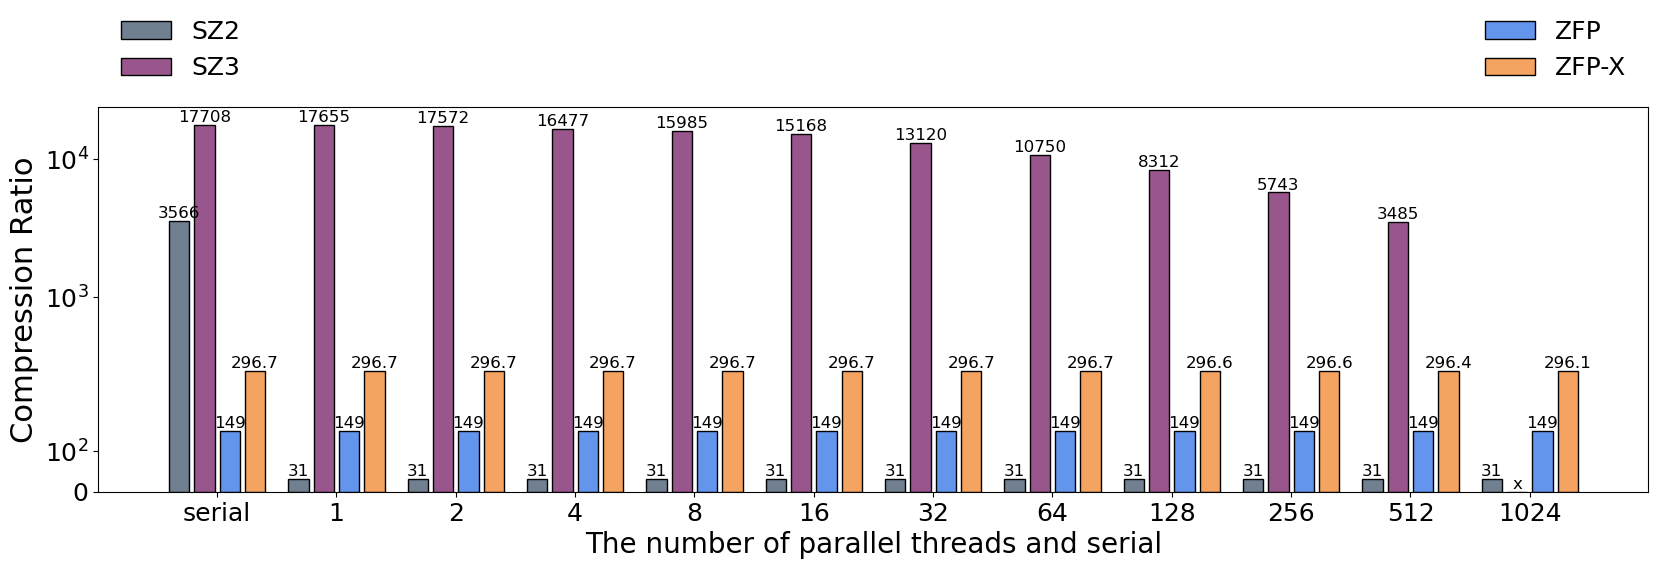

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from queue import Queue
import csv 
#sys.argv=["test.py",'sz2',"CESM"]
#argv = sys.argv[:]
# type=sys.argv[1]
# file_name=sys.argv[2]
dataset = 'NYX'
filed = 'baryon_density'
size = 512 * 512 * 512 * 4 * 6 / 1024 /1024
#size = 500 * 500 * 100 * 4 * 20 / 1024 /1024 
path_zfp = './ratio/zfp/'+dataset+'_zfp.csv'
path_zfpx = './ratio/omp/zfpx/'+dataset+'_zfpx.csv'
path_sz2 = './ratio/omp/sz2/'+dataset+'_sz2.csv'
path_sz3 = './ratio/omp/sz3/'+dataset+'_sz3.csv'


data_zfp = pd.read_csv(path_zfp)
data_zfpx = pd.read_csv(path_zfpx)
data_sz2 = pd.read_csv(path_sz2)
data_sz3 = pd.read_csv(path_sz3)

serial_zfpx = pd.read_csv('./ratio/zfpx/'+dataset+'_zfpx.csv')
serial_sz2 = pd.read_csv('./ratio/sz2/'+dataset+'_sz2.csv')
serial_sz3 = pd.read_csv('./ratio/sz3/'+dataset+'_sz3.csv')

fdata_zfp = data_zfp[data_zfp[dataset] == filed]
fdata_zfpx = data_zfpx[data_zfpx[dataset] == filed]
fdata_sz2 = data_sz2[data_sz2[dataset] == filed]
fdata_sz3 = data_sz3[data_sz3[dataset] == filed]


fserial_zfpx = serial_zfpx[serial_zfpx[dataset] == filed]
fserial_sz2 = serial_sz2[serial_sz2[dataset] == filed]
fserial_sz3 = serial_sz3[serial_sz3[dataset] == filed]

#thread = [1,2,4,8,16,32,64,128,256,512]
thread = [1,2,4,8,16,32,64,128,256,512,1024]
error = '1E-3'
x = np.arange(len(thread)+1)

width = 0.17
interval = width * 0.25
zfp, zfpx, sz2, sz3, ser = [], [], [], [], []
zfpx.extend(fserial_zfpx[error])
sz2.extend(fserial_sz2[error])
sz3.extend(fserial_sz3[error])
zfp.extend(fdata_zfp[error])
for i in thread:
    zfp.extend(fdata_zfp[error])
    zfpx.extend(fdata_zfpx[fdata_zfpx['threads'] == i][error])
    sz2.extend(fdata_sz2[fdata_sz2['threads'] == i][error])
    if fdata_sz3[fdata_sz3['threads'] == i][error].empty:
        sz3.extend([0])
    else:
        sz3.extend(fdata_sz3[fdata_sz3['threads'] == i][error])
    #ser.append(fserial[error])

thread = ['serial'] + thread
# p0 = plt.plot(x, sz2, linewidth=6, marker='o', markersize=12, color="#56ae57")
# # p1 = plt.plot(x, sz3, linewidth=6, marker='*', markersize=12, color="red", linestyle='--', dashes=(2.5, 3))
# # p2 = plt.plot(x, zfp, linewidth=6, marker='^', markersize=12, color="#1E90FF")
# p3 = plt.plot(x, zfpx, linewidth=6, marker='v', markersize=12, color="#FFA500")
plt.yscale('symlog', linthresh=300, linscale=0.8)
p0 = plt.bar(x, sz2, width, color="#708090", edgecolor='k')
p1 = plt.bar(x + width * 1 + interval * 1, sz3, width, color="#98568d", edgecolor='k')
p2 = plt.bar(x + width * 2 + interval * 2, zfp, width,  color="#6495ED", edgecolor='k')
p3 = plt.bar(x + width * 3 + interval * 3, zfpx, width, color="#F4A460", edgecolor='k')
for i in range(len(x)):
    plt.text(x[i], sz2[i],'%d'%sz2[i], ha = 'center',va = 'bottom',fontsize=12)
    if sz3[i] != 0 :
        plt.text(x[i] + width * 1 + interval * 1, sz3[i],'%d'%sz3[i], ha = 'center',va = 'bottom',fontsize=12)
    else:
        plt.text(x[i] + width * 1 + interval * 1, sz3[i],'x', ha = 'center',va = 'bottom',fontsize=12)

    plt.text(x[i] + width * 2 + interval * 2, zfp[i],'%d'%zfp[i], ha = 'center',va = 'bottom',fontsize=12)
    plt.text(x[i] + width * 3 + interval * 3, zfpx[i],'%.1f'%zfpx[i], ha = 'center',va = 'bottom',fontsize=12)

# yticks = [0,100,200,400,1000,5000,10000]
# yticks += [int(max(sz3)//100*100) if int(max(sz3)//100*100) < 1000 else 0]
# yticklabels = [str(ytick) if ytick <= 50 or ytick % 100 == 0 else '' for ytick in yticks]
# plt.yticks(yticks, yticklabels)

plt.xticks(x + width * 1.5 + interval * 1.5, thread, fontsize=18)
# plt.xticks(x, thread, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('The number of parallel threads and serial', fontsize=20)
plt.ylabel('Compression Ratio', fontsize=22)
a=plt.legend([p0[0],p1[0]], ['SZ2','SZ3'],bbox_to_anchor=(0.00, 1.01), loc=3, frameon=False,fontsize=18)
plt.legend([p2[0],p3[0]], ['ZFP','ZFP-X'],bbox_to_anchor=(1.00,1.01), loc=4, frameon=False,fontsize=18)
plt.gca().add_artist(a)
plt.gcf().set_size_inches(20,5) 
# size = plt.gcf().get_size_inches()
plt.savefig("./draw/omp-ratio-N.pdf",bbox_inches='tight')

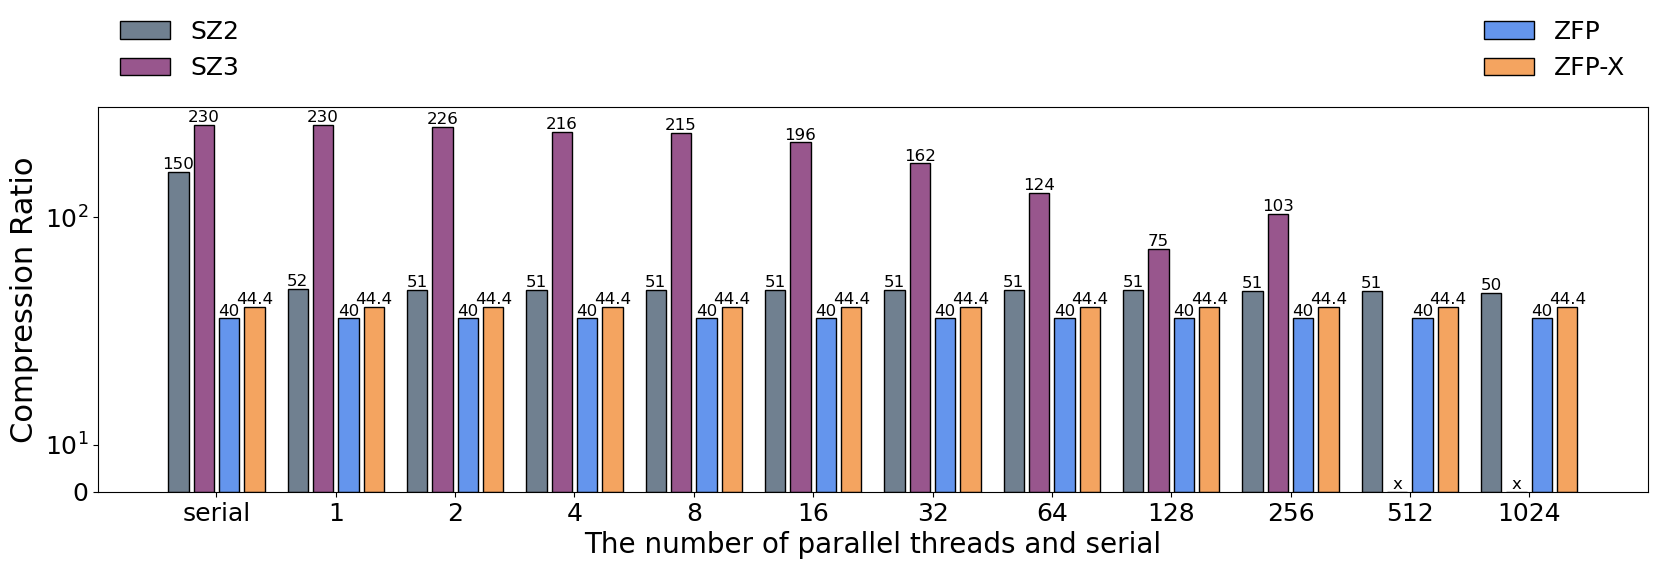

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from queue import Queue
import csv 
#sys.argv=["test.py",'sz2',"CESM"]
#argv = sys.argv[:]
# type=sys.argv[1]
# file_name=sys.argv[2]
dataset = 'Miranda'
filed = 'density'
size = 512 * 512 * 512 * 4 * 6 / 1024 /1024
#size = 500 * 500 * 100 * 4 * 20 / 1024 /1024 
path_zfp = './ratio/zfp/'+dataset+'_zfp.csv'
path_zfpx = './ratio/omp/zfpx/'+dataset+'_zfpx.csv'
path_sz2 = './ratio/omp/sz2/'+dataset+'_sz2.csv'
path_sz3 = './ratio/omp/sz3/'+dataset+'_sz3.csv'


data_zfp = pd.read_csv(path_zfp)
data_zfpx = pd.read_csv(path_zfpx)
data_sz2 = pd.read_csv(path_sz2)
data_sz3 = pd.read_csv(path_sz3)

serial_zfpx = pd.read_csv('./ratio/zfpx/'+dataset+'_zfpx.csv')
serial_sz2 = pd.read_csv('./ratio/sz2/'+dataset+'_sz2.csv')
serial_sz3 = pd.read_csv('./ratio/sz3/'+dataset+'_sz3.csv')

fdata_zfp = data_zfp[data_zfp[dataset] == filed]
fdata_zfpx = data_zfpx[data_zfpx[dataset] == filed]
fdata_sz2 = data_sz2[data_sz2[dataset] == filed]
fdata_sz3 = data_sz3[data_sz3[dataset] == filed]


fserial_zfpx = serial_zfpx[serial_zfpx[dataset] == filed]
fserial_sz2 = serial_sz2[serial_sz2[dataset] == filed]
fserial_sz3 = serial_sz3[serial_sz3[dataset] == filed]

#thread = [1,2,4,8,16,32,64,128,256,512]
thread = [1,2,4,8,16,32,64,128,256,512,1024]
error = '1E-3'
x = np.arange(len(thread)+1)

width = 0.17
interval = width * 0.25
zfp, zfpx, sz2, sz3, ser = [], [], [], [], []
zfpx.extend(fserial_zfpx[error])
sz2.extend(fserial_sz2[error])
sz3.extend(fserial_sz3[error])
zfp.extend(fdata_zfp[error])
for i in thread:
    zfp.extend(fdata_zfp[error])
    zfpx.extend(fdata_zfpx[fdata_zfpx['threads'] == i][error])
    sz2.extend(fdata_sz2[fdata_sz2['threads'] == i][error])
    if fdata_sz3[fdata_sz3['threads'] == i][error].empty:
        sz3.extend([0])
    else:
        sz3.extend(fdata_sz3[fdata_sz3['threads'] == i][error])
    #ser.append(fserial[error])

thread = ['serial'] + thread
# p0 = plt.plot(x, sz2, linewidth=6, marker='o', markersize=12, color="#56ae57")
# # p1 = plt.plot(x, sz3, linewidth=6, marker='*', markersize=12, color="red", linestyle='--', dashes=(2.5, 3))
# # p2 = plt.plot(x, zfp, linewidth=6, marker='^', markersize=12, color="#1E90FF")
# p3 = plt.plot(x, zfpx, linewidth=6, marker='v', markersize=12, color="#FFA500")
plt.yscale('symlog', linthresh=30, linscale=0.5)
p0 = plt.bar(x, sz2, width, color="#708090", edgecolor='k')
p1 = plt.bar(x + width * 1 + interval * 1, sz3, width, color="#98568d", edgecolor='k')
p2 = plt.bar(x + width * 2 + interval * 2, zfp, width,  color="#6495ED", edgecolor='k')
p3 = plt.bar(x + width * 3 + interval * 3, zfpx, width, color="#F4A460", edgecolor='k')
for i in range(len(x)):
    plt.text(x[i], sz2[i],'%d'%sz2[i], ha = 'center',va = 'bottom',fontsize=12)
    if sz3[i] != 0 :
        plt.text(x[i] + width * 1 + interval * 1, sz3[i],'%d'%sz3[i], ha = 'center',va = 'bottom',fontsize=12)
    else:
        plt.text(x[i] + width * 1 + interval * 1, sz3[i],'x', ha = 'center',va = 'bottom',fontsize=12)

    plt.text(x[i] + width * 2 + interval * 2, zfp[i],'%d'%zfp[i], ha = 'center',va = 'bottom',fontsize=12)
    plt.text(x[i] + width * 3 + interval * 3, zfpx[i],'%.1f'%zfpx[i], ha = 'center',va = 'bottom',fontsize=12)

# yticks = [0,100,200,400,1000,5000,10000]
# yticks += [int(max(sz3)//100*100) if int(max(sz3)//100*100) < 1000 else 0]
# yticklabels = [str(ytick) if ytick <= 50 or ytick % 100 == 0 else '' for ytick in yticks]
# plt.yticks(yticks, yticklabels)

plt.xticks(x + width * 1.5 + interval * 1.5, thread, fontsize=18)
# plt.xticks(x, thread, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('The number of parallel threads and serial', fontsize=20)
plt.ylabel('Compression Ratio', fontsize=22)
a=plt.legend([p0[0],p1[0]], ['SZ2','SZ3'],bbox_to_anchor=(0.00, 1.01), loc=3, frameon=False,fontsize=18)
plt.legend([p2[0],p3[0]], ['ZFP','ZFP-X'],bbox_to_anchor=(1.00,1.01), loc=4, frameon=False,fontsize=18)
plt.gca().add_artist(a)
plt.gcf().set_size_inches(20,5) 
# size = plt.gcf().get_size_inches()
plt.savefig("./draw/omp-ratio-M.pdf",bbox_inches='tight')

In [ ]:
674.14

In [47]:
import struct

# 定义四个浮点数
numbers = [0.314, 0.271, 162.0, 152.1534]

# 打开一个二进制文件用于写入
with open('output.bin', 'wb') as file:
    # 将浮点数转换为二进制数据并写入文件
    for number in numbers:
        file.write(struct.pack('d', number))

print("成功将四个浮点数写入文件")


成功将四个浮点数写入文件


In [48]:
x = 2017/1929 + 1718.8/1167.9 + 296.7/149.89 + 96.05/73.98 + 33.79/30.58 + 9.23/8.97
y= 107.61/85.28 + 68.11/58.43 + 44.38/40.05 + 27.43/25.71 + 20.46/19.49 + 15.99/15.39
z= 51.42/43.9 + 13.23/12.67 + 6.62/6.48 + 4.16/4.11 +  2.75/2.72 + 2.19/2.17
(x / 6 + y /6 + z/6)/3

1.1605471164052283